In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
# to avoid UnicodeDecodeError i will use latin1 
df = pd.read_csv("Instagram data.csv",encoding='latin1')
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### The data does not contain any missing values and data types are correct

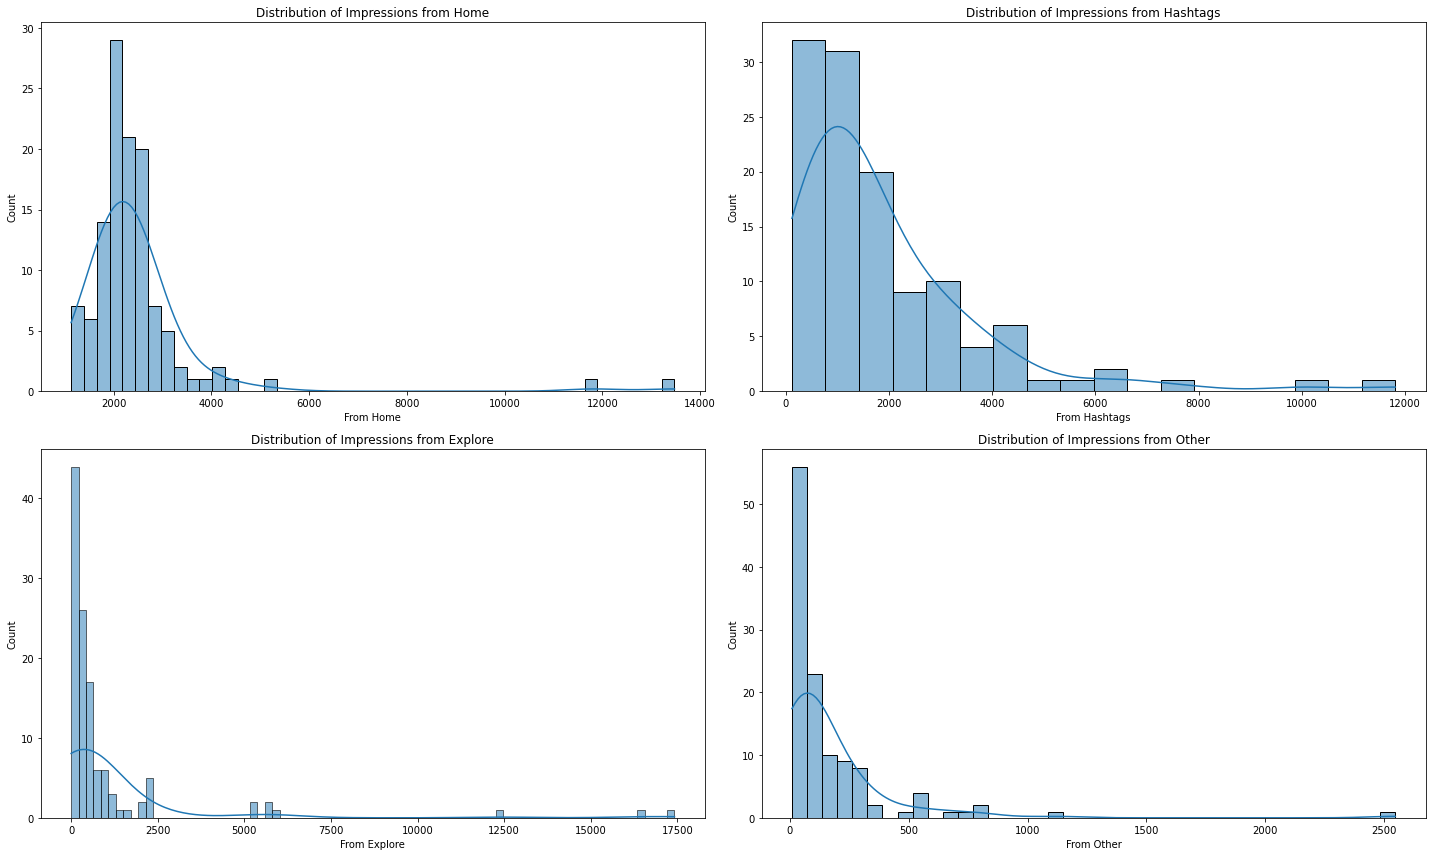

In [4]:
# let’s start with analyzing the reach of the distribution of impressions I have received 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# from home
sns.histplot(df['From Home'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Impressions from Home')

# from hashtages
sns.histplot(df['From Hashtags'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Impressions from Hashtags')

# from explore
sns.histplot(df['From Explore'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Impressions from Explore')

# from other
sns.histplot(df['From Other'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Impressions from Other')

plt.tight_layout()
plt.show()

### Some posts have received a good reach from the explore section, but it’s still very low 

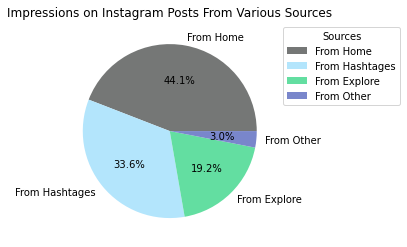

In [5]:
# Now i have look at the percentage of impressions from various sources
home = df['From Home'].sum()
hashtages = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()

Colors = ['#757776','#b3e5fc','#63dea1','#7986cb']
labels = ['From Home','From Hashtages','From Explore','From Other']
value = [home,hashtages,explore,other]

_, _, _ = plt.pie(value, labels=labels, autopct='%1.1f%%', colors=Colors)
plt.title('Impressions on Instagram Posts From Various Sources')
plt.legend(title = 'Sources', labels= labels, bbox_to_anchor=(1, 1));


### From the pie chart i notice that most of the impressions are from the followers (From Home page)

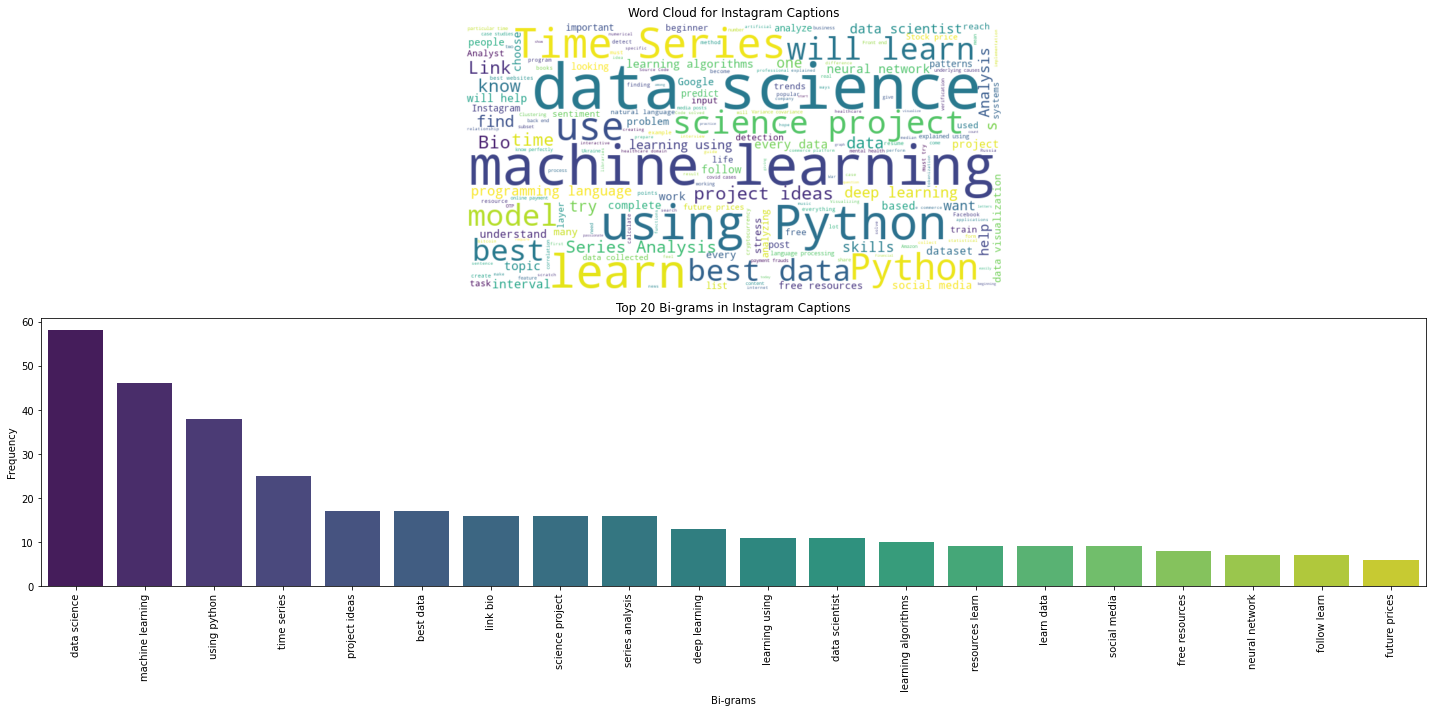

In [6]:
# I need to look at the most used words in the caption of my Instagram posts
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  

text = ' '.join(df['Caption'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Word Cloud for Instagram Captions')

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['Caption'].dropna())
ngram_freq = pd.DataFrame(X.sum(axis=0).T, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
ngram_freq = ngram_freq.sort_values(by='Frequency', ascending=False)

sns.barplot(x=ngram_freq.head(20).index, y=ngram_freq.head(20)['Frequency'], palette='viridis', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Top 20 Bi-grams in Instagram Captions')
ax[1].set_xlabel('Bi-grams')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

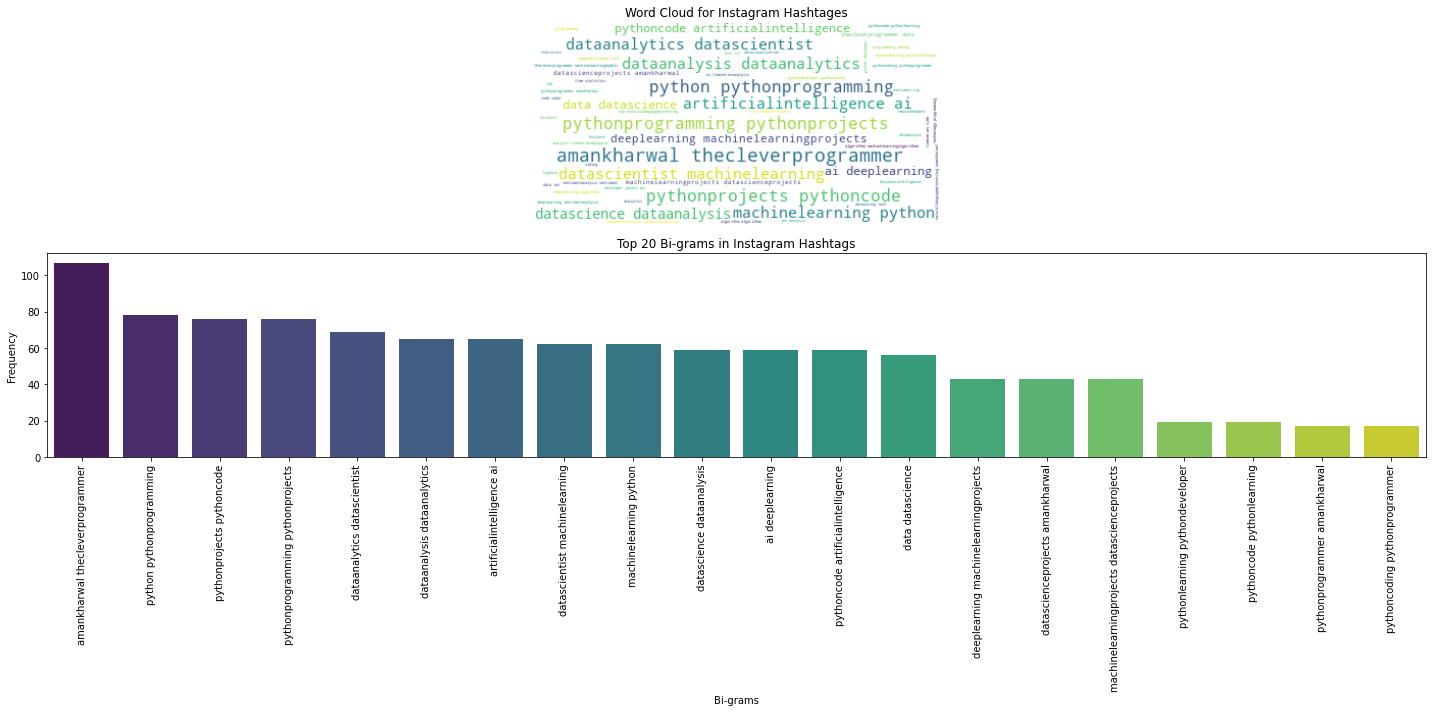

In [7]:
# I need to look at the most used words in the Hashtages of my Instagram posts
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Word Cloud for Instagram Hashtages')

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['Hashtags'].dropna())
ngram_freq = pd.DataFrame(X.sum(axis=0).T, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
ngram_freq = ngram_freq.sort_values(by='Frequency', ascending=False)

sns.barplot(x=ngram_freq.head(20).index, y=ngram_freq.head(20)['Frequency'], palette='viridis', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Top 20 Bi-grams in Instagram Hashtags')
ax[1].set_xlabel('Bi-grams')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

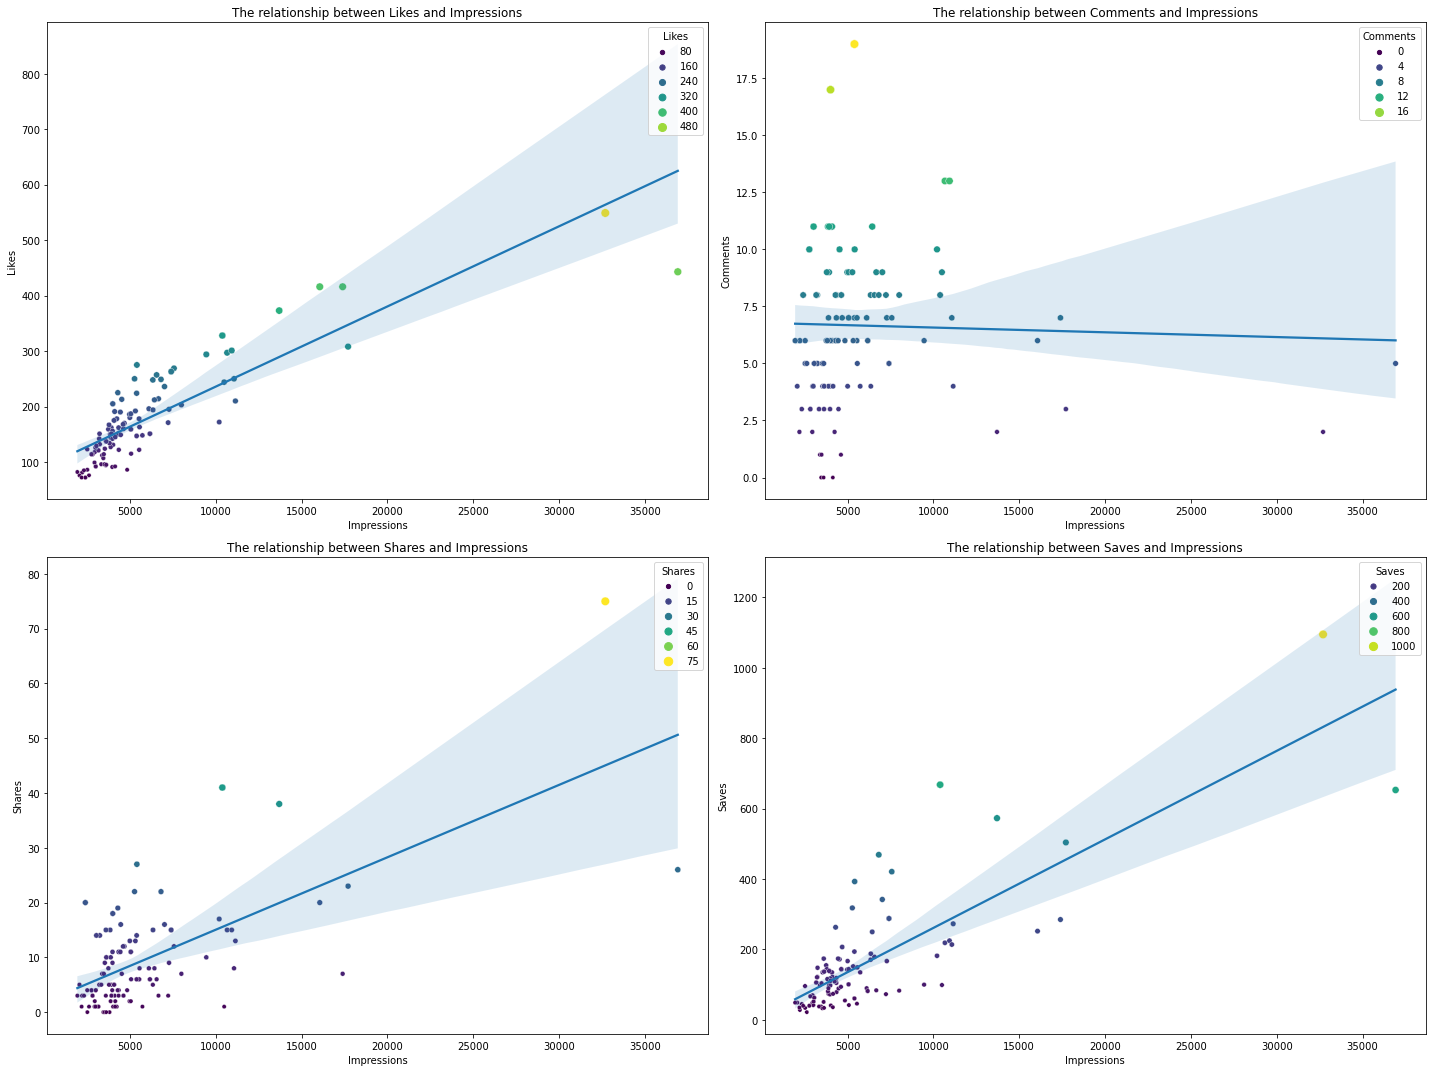

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Impressions and Likes
sns.scatterplot(data=df, x='Impressions', y='Likes', size='Likes', ax=ax[0, 0], hue='Likes', palette='viridis')
sns.regplot(data=df, x='Impressions', y='Likes', ax=ax[0, 0], scatter=False)
ax[0, 0].set_title('The relationship between Likes and Impressions', loc='center')

# Impressions and Comments
sns.scatterplot(data=df, x='Impressions', y='Comments', size='Comments', ax=ax[0, 1], hue='Comments', palette='viridis')
sns.regplot(data=df, x='Impressions', y='Comments', ax=ax[0, 1], scatter=False)
ax[0, 1].set_title('The relationship between Comments and Impressions', loc='center')

# Impressions and Shares
sns.scatterplot(data=df, x='Impressions', y='Shares', size='Shares', ax=ax[1, 0], hue='Shares', palette='viridis')
sns.regplot(data=df, x='Impressions', y='Shares', ax=ax[1, 0], scatter=False)
ax[1, 0].set_title('The relationship between Shares and Impressions', loc='center')

# Impressions and Saves
sns.scatterplot(data=df, x='Impressions', y='Saves', size='Saves', ax=ax[1, 1], hue='Saves', palette='viridis')
sns.regplot(data=df, x='Impressions', y='Saves', ax=ax[1, 1], scatter=False)
ax[1, 1].set_title('The relationship between Saves and Impressions', loc='center')

plt.tight_layout()
plt.show()


### I notice that :
 1. There is a linear relationship between the number of likes and the reach I got on Instagram.
 2. The number of comments we get on a post doesn’t affect its reach
 3. A more number of shares will result in a higher reach, but shares don’t affect the reach of a post
 4. There is a linear relationship between the number of times my post is saved and the reach I got on Instagram.

In [9]:
# let’s have a look at the correlation of all the columns with the Impressions
corr = df.corr()
corr['Impressions'].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

### There are Three types of correlations :
1. Strong Positive Relationships:
    1. From Explore (0.89): This suggests that an increase in impressions from it significantly boosts the overall impressions.
    2. Follows (0.89): More followers correspond to higher impressions.
    3.Likes (0.85): Posts with more likes tend to get more impressions.
2. Good Positive Relationships:
    1. From Home (0.84): This correlation indicates a significant positive effect of having posts appear on the home feed.
    2. Saves (0.78): Posts that are saved more tend to receive higher impressions.
    3. Profile Visits (0.76): More profile visits are positively correlated with increased impressions.
    4. Shares (0.63): Although not as strong, posts that are shared more tend to have higher impressions.
3. Other correlations are weak.

In [10]:
# Let’s have a look at the relationship between the total profile visits and the number of followers gained
fig = px.scatter(data_frame=df, x ='Profile Visits', y='Follows', size='Follows', trendline='ols'
           ,title ='Relationship Between Profile Visits and Followers')
fig.show()

### There is a linear relationship between Profile Visits and Followers

  # Model Building
I will train a machine learning model to predict the reach of an Instagram post.


In [11]:
# splitting
x = df.drop(['Impressions','Caption','Hashtags'],axis = 1)
y = df['Impressions']
x_train , x_test, y_train  , y_test = train_test_split(x,y, test_size =0.3, random_state = 42)

# training the model
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9993561846436031